In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

In [3]:
df1 = pd.read_csv("../../../data/WellProduction.csv",parse_dates=['ProdPeriod'],index_col=False)
df1 = df1.drop(columns=['WellHeader.Match'])

In [4]:
df1.sample(10)

,EPAssetsId,ProdPeriod,ProdType,Volume
296463,1151911,2017-04-30,Production Hours,696.000000
460517,1163752,2019-10-31,Water Production (Bbls),18.869400
478718,1151416,2019-11-30,Water Production (Bbls),23.901240
788966,41279,2018-03-31,Gas Production (MMcf),43.334791
909826,37337,2019-06-30,Gas Production (MMcf),213.693386
701004,1161714,2019-01-31,Gas Production (MMcf),0.229546
431641,1149815,2019-06-30,Water Production (Bbls),49.689420
498044,1173688,2019-11-30,Oil Production (Bbls),2818.459380
715670,1169332,2018-12-31,Gas Production (MMcf),0.014126
460794,1152562,2019-10-31,Water Production (Bbls),37.109820


In [5]:
df1['ProdPeriod']

0        2019-12-31
1        2019-12-31
2        2019-12-31
3        2019-12-31
4        2019-12-31
            ...    
961049   2019-11-30
961050   2019-11-30
961051   2019-11-30
961052   2019-11-30
961053   2019-11-30
Name: ProdPeriod, Length: 961054, dtype: datetime64[ns]

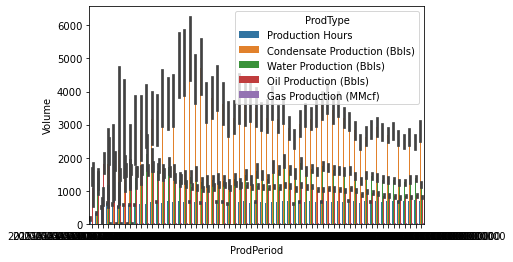

In [6]:
sns.barplot(x='ProdPeriod',y='Volume',hue='ProdType',data=df1)

In [7]:
well_id = [2583383, 2607434, 1170339, 2579261, 2582203, 1151694, 2581801,
       2605638, 1168104, 2591839]
def single_Well_plot1(well_id):
    df1
    df_well = df1[(df1['EPAssetsId'].isin(well_id)) & (df1['ProdType'] != 'Production Hours')]
    chart= alt.Chart(df_well).mark_bar(size=5).encode(
        x=alt.X('ProdPeriod',timeUnit='yearmonthdate'),
        y='Volume',
        color='ProdType',
         facet=alt.Facet('EPAssetsId', columns=3)
        ).properties(title='Wells',
    width=180,
    height=150
    ).interactive()
    return display(chart)
    


In [8]:
single_Well_plot1(well_id)

alt.Chart(...)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  961054 non-null  int64         
 1   ProdPeriod  961054 non-null  datetime64[ns]
 2   ProdType    961054 non-null  object        
 3   Volume      961054 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 29.3+ MB


## Create data frame for each Type of production monthly

In [10]:
df_well = df1[(df1['EPAssetsId'].isin(well_id)) & (df1['ProdType'] != 'Production Hours')]

In [11]:
## Group the Volume per Prod Type for each month in the data seet and fill with 0 for NaNa
df3=df1.groupby(['EPAssetsId','ProdPeriod','ProdType']).sum().unstack('ProdType')
df3.fillna(value=0,inplace = True) #Will fill NaNa to the very end so the mean it is calculated correctly
df3.head()

Volume                        \
ProdType              Condensate Production (Bbls) Gas Production (MMcf)   
EPAssetsId ProdPeriod                                                      
3373       2017-08-31                      0.00000              2.330777   
           2017-09-30                   3744.94692             55.009864   
           2017-10-31                   3792.12042             48.999285   
           2017-11-30                   5577.16566             58.516624   
           2017-12-31                   4994.73018             77.385321   

                                                              \
ProdType              Oil Production (Bbls) Production Hours   
EPAssetsId ProdPeriod                                          
3373       2017-08-31                   0.0             60.0   
           2017-09-30                   0.0            499.2   
           2017-10-31                   0.0            417.6   
           2017-11-30                   0.0            619.2   
           2017-12-31                   0.0            662.4   

                                               
ProdType              Water Production (Bbls)  
EPAssetsId ProdPeriod                          
3373       2017-08-31                 0.00000  
           2017-09-30              2213.38062  
           2017-10-31              2327.22600  
           2017-11-30              2127.21036  
           2017-12-31              2403.96156

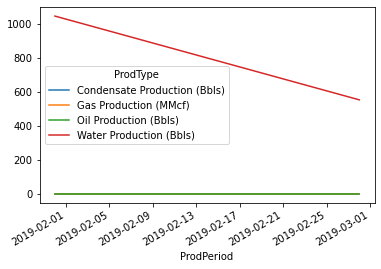

In [12]:
well_id = 43073
def single_Well_plot(well_id):
    df3.reset_index(level=0, inplace=True)
    df_well = df3[df3['EPAssetsId']== well_id]
    df_well.columns = df_well.columns.droplevel()
    df_well=df_well.drop(columns=['','Production Hours'])
    return df_well.plot()
single_Well_plot(well_id)

In [13]:
## Group the Volume per Prod Type for each month in the data seet and fill with 0 for NaNa
df2=df1.groupby(['EPAssetsId','ProdPeriod','ProdType']).sum().unstack('ProdPeriod')
#df2.fillna(value=0,inplace = True) Will fill NaNa to the very end so the mean it is calculated correctly

In [14]:
df2.head()

Volume                        \
ProdPeriod                              2015-01-31 2015-02-28 2015-03-31   
EPAssetsId ProdType                                                        
3373       Condensate Production (Bbls)        NaN        NaN        NaN   
           Gas Production (MMcf)               NaN        NaN        NaN   
           Production Hours                    NaN        NaN        NaN   
           Water Production (Bbls)             NaN        NaN        NaN   
6976       Condensate Production (Bbls)        NaN        NaN        NaN   

                                                                          \
ProdPeriod                              2015-04-30 2015-05-31 2015-06-30   
EPAssetsId ProdType                                                        
3373       Condensate Production (Bbls)        NaN        NaN        NaN   
           Gas Production (MMcf)               NaN        NaN        NaN   
           Production Hours                    NaN        NaN        NaN   
           Water Production (Bbls)             NaN        NaN        NaN   
6976       Condensate Production (Bbls)        NaN        NaN        NaN   

                                                                          \
ProdPeriod                              2015-07-31 2015-08-31 2015-09-30   
EPAssetsId ProdType                                                        
3373       Condensate Production (Bbls)        NaN        NaN        NaN   
           Gas Production (MMcf)               NaN        NaN        NaN   
           Production Hours                    NaN        NaN        NaN   
           Water Production (Bbls)             NaN        NaN        NaN   
6976       Condensate Production (Bbls)        NaN        NaN        NaN   

                                                    ...              \
ProdPeriod                              2015-10-31  ...  2019-04-30   
EPAssetsId ProdType                                 ...               
3373       Condensate Production (Bbls)        NaN  ...  747.857220   
           Gas Production (MMcf)               NaN  ...   58.562533   
           Production Hours                    NaN  ...  708.000000   
           Water Production (Bbls)             NaN  ...  300.652440   
6976       Condensate Production (Bbls)        NaN  ...    6.918780   

                                                                             \
ProdPeriod                               2019-05-31  2019-06-30  2019-07-31   
EPAssetsId ProdType                                                           
3373       Condensate Production (Bbls)  815.158080  820.189920  1040.96190   
           Gas Production (MMcf)          58.308266   40.989888    40.54139   
           Production Hours              703.200000  712.800000   700.80000   
           Water Production (Bbls)       335.246340  275.493240   343.42308   
6976       Condensate Production (Bbls)    5.660820    3.773880     3.77388   

                                                                             \
ProdPeriod                               2019-08-31  2019-09-30  2019-10-31   
EPAssetsId ProdType                                                           
3373       Condensate Production (Bbls)  903.844260  483.056640  560.421180   
           Gas Production (MMcf)          38.765056   43.242973   43.257099   
           Production Hours              638.400000  626.400000  734.400000   
           Water Production (Bbls)       221.400960  214.482180  250.334040   
6976       Condensate Production (Bbls)    3.773880    3.144900    3.144900   

                                                                            
ProdPeriod                               2019-11-30  2019-12-31 2020-01-31  
EPAssetsId ProdType                                                         
3373       Condensate Production (Bbls)  352.857780  249.705060        NaN  
           Gas Production (MMcf)          39.436037   41.141742        NaN

In [15]:
#Reset index so the prodType is now a column
df3 = df2.reset_index('ProdType')

In [16]:
# identify the prodType values
prod_type=df3['ProdType'].unique()
prod_type

array(['Condensate Production (Bbls)', 'Gas Production (MMcf)',
       'Production Hours', 'Water Production (Bbls)',
       'Oil Production (Bbls)'], dtype=object)

In [17]:

def create_labels(prodtype,df):
    """ Create new labels for columns with the type of produciton and date"""
    months =['January','February','March','April','May','June','July','August','September','October','November','December']
    years = ['2015','2016','2017','2018','2019','2020']
    n =len(df.columns)
    labels =[]

    while n > 0:
        for year in years:
                for month in months:
                    if n >0:
                        labels.append(prodtype+" "+ month+" " + year)
                        n = n-1
    df.columns=labels                
    return df

In [18]:
# create a dataframe list with a dataframe for each prodType
dfs=[]
for product in prod_type:
    #filter by type
    df = df3[df3['ProdType']== product]
    #change from multindex columns to a single index
    df.columns = df.columns.droplevel()
    df = df.drop(columns="")
    df =create_labels(product, df)
    #calcualte total volume and monthly volume.
    total = df.sum(axis=1,skipna=True)
    mean = df.mean(axis=1,skipna=True)
    df[product+' Total'] = total
    df[product + ' Average'] = mean
    dfs.append(df.reset_index())


In [19]:
#checking number of wells in dataframes
for df in dfs:
    print(df.shape)

(2924, 64)
(10374, 64)
(10196, 64)
(7254, 64)
(6978, 64)


Just 176 wells have condensate production, and 727 water production

In [20]:
#assing dataframe names
gas_production = dfs[0]
oil_production = dfs[1]
time_production = dfs[2]
water_production = dfs[3]
condensate_production = dfs[4]

In [21]:
#check the dataframe
gas_production.sample(10)

,EPAssetsId,Condensate Production (Bbls) January 2015,Condensate Production (Bbls) February 2015,Condensate Production (Bbls) March 2015,Condensate Production (Bbls) April 2015,Condensate Production (Bbls) May 2015,Condensate Production (Bbls) June 2015,Condensate Production (Bbls) July 2015,Condensate Production (Bbls) August 2015,Condensate Production (Bbls) September 2015,...,Condensate Production (Bbls) June 2019,Condensate Production (Bbls) July 2019,Condensate Production (Bbls) August 2019,Condensate Production (Bbls) September 2019,Condensate Production (Bbls) October 2019,Condensate Production (Bbls) November 2019,Condensate Production (Bbls) December 2019,Condensate Production (Bbls) January 2020,Condensate Production (Bbls) Total,Condensate Production (Bbls) Average
1337,2579263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.56206,33.96492,NaN,33.33594,62.26902,NaN,NaN,303.79734,18.987334
1720,2592532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,420.15864,973.66104,965.48430,820.18992,10147.33434,1127.481593
652,41249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3519.77208,276.12222,8792.51142,6960.92166,6278.47836,5174.61846,5024.92122,NaN,37463.30676,4682.913345
2553,2612844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.88694,NaN,NaN,557.90526,185.968420
2154,2602789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4531.80090,4009.11852,4078.93530,3855.01842,4142.46228,3932.38296,3787.08858,3374.47770,243465.57840,9017.243644
1040,42271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.75634,20.756340
2385,2608501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.27818,340.278180
2793,2618353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,62.26902,NaN,3.14490,NaN,65.41392,32.706960
1872,2595619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.57960,3.14490,NaN,7.54776,NaN,NaN,NaN,667.97676,66.797676
2020,2598295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.62898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.94090,14.326767


## Join dataframes 

In [22]:
join1=pd.merge(gas_production, water_production, on='EPAssetsId', how='outer').fillna(0)

In [23]:
join2=pd.merge(join1,oil_production, on='EPAssetsId', how='outer').fillna(0)
join3=pd.merge(join2,time_production, on ='EPAssetsId', how='outer').fillna(0)
final_df=pd.merge(join3,condensate_production, on ='EPAssetsId', how='outer').fillna(0)

In [24]:
final_df.sample(10)

,EPAssetsId,Condensate Production (Bbls) January 2015,Condensate Production (Bbls) February 2015,Condensate Production (Bbls) March 2015,Condensate Production (Bbls) April 2015,Condensate Production (Bbls) May 2015,Condensate Production (Bbls) June 2015,Condensate Production (Bbls) July 2015,Condensate Production (Bbls) August 2015,Condensate Production (Bbls) September 2015,...,Oil Production (Bbls) June 2019,Oil Production (Bbls) July 2019,Oil Production (Bbls) August 2019,Oil Production (Bbls) September 2019,Oil Production (Bbls) October 2019,Oil Production (Bbls) November 2019,Oil Production (Bbls) December 2019,Oil Production (Bbls) January 2020,Oil Production (Bbls) Total,Oil Production (Bbls) Average
5170,1166493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,367.95330,439.02804,440.91498,300.02346,165.42174,171.71154,166.67970,415.75578,20836.84944,833.473978
7090,2604974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1447.28298,1466.15238,1000.07820,1163.61300,1398.22254,1228.39794,1276.20042,1106.37582,61105.40700,2182.335964
7824,2617807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1742.27460,1447.28298,1573.70796,1312.05228,1192.54608,890.63568,783.08010,523.31136,20399.07936,1699.923280
3937,1152798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159.13194,161.64786,167.30868,142.77846,143.40744,108.81354,107.55558,110.07150,25876.23720,539.088275
10126,2615526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,931.51938,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,931.51938,931.519380
7089,2604973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2296.40598,2186.96346,1574.96592,1990.09272,1859.89386,1451.05686,1918.38900,1747.93542,89124.57906,3300.910336
7387,2610492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1667.42598,1691.32722,1554.83856,1576.22388,1164.87096,1218.33426,1410.17316,1243.49346,29926.86840,1496.343420
796,41588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
1055,42317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
2683,2615712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000


In [25]:
final_df[(final_df['Condensate Production (Bbls) Total']==0)&(final_df['Oil Production (Bbls) Total']==0)&(final_df['Gas Production (MMcf) Total']==0)]

,EPAssetsId,Condensate Production (Bbls) January 2015,Condensate Production (Bbls) February 2015,Condensate Production (Bbls) March 2015,Condensate Production (Bbls) April 2015,Condensate Production (Bbls) May 2015,Condensate Production (Bbls) June 2015,Condensate Production (Bbls) July 2015,Condensate Production (Bbls) August 2015,Condensate Production (Bbls) September 2015,...,Oil Production (Bbls) June 2019,Oil Production (Bbls) July 2019,Oil Production (Bbls) August 2019,Oil Production (Bbls) September 2019,Oil Production (Bbls) October 2019,Oil Production (Bbls) November 2019,Oil Production (Bbls) December 2019,Oil Production (Bbls) January 2020,Oil Production (Bbls) Total,Oil Production (Bbls) Average
3285,43073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3286,43074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
final_df.shape

(10386, 316)

In [27]:
df_hist_average=final_df[['EPAssetsId','Condensate Production (Bbls) Average', 'Gas Production (MMcf) Average',
       'Production Hours Average', 'Water Production (Bbls) Average',
       'Oil Production (Bbls) Average']]

In [28]:
df_hist_total=final_df[['EPAssetsId','Condensate Production (Bbls) Total', 'Gas Production (MMcf) Total',
       'Production Hours Total', 'Water Production (Bbls) Total',
       'Oil Production (Bbls) Total']]

In [29]:
df_hist_average

,EPAssetsId,Condensate Production (Bbls) Average,Gas Production (MMcf) Average,Production Hours Average,Water Production (Bbls) Average,Oil Production (Bbls) Average
0,3373,1747.261513,56.115461,601.737931,880.077801,0.00000
1,6976,99.038143,28.309374,649.600000,834.158518,0.00000
2,6977,103.717518,56.482131,632.277551,594.784026,0.00000
3,7129,38.787100,58.840424,604.717241,834.678149,0.00000
4,7130,41.198190,82.397403,661.161290,685.304145,0.00000
...,...,...,...,...,...,...
10381,2624624,0.000000,11.297205,262.000000,0.000000,6781.03338
10382,2625202,0.000000,43.608481,0.000000,0.000000,7159.36485
10383,2625908,0.000000,0.017657,148.000000,0.000000,1430.30052
10384,1165208,0.000000,0.000000,48.000000,0.000000,5.66082


In [31]:
pd.melt(df_hist_average, id_vars=['EPAssetsId'], value_vars=['Condensate Production (Bbls) Average', 'Gas Production (MMcf) Average',
       'Production Hours Average', 'Water Production (Bbls) Average',
       'Oil Production (Bbls) Average'])

,EPAssetsId,variable,value
0,3373,Condensate Production (Bbls) Average,1747.261513
1,6976,Condensate Production (Bbls) Average,99.038143
2,6977,Condensate Production (Bbls) Average,103.717518
3,7129,Condensate Production (Bbls) Average,38.787100
4,7130,Condensate Production (Bbls) Average,41.198190
...,...,...,...
51925,2624624,Oil Production (Bbls) Average,6781.033380
51926,2625202,Oil Production (Bbls) Average,7159.364850
51927,2625908,Oil Production (Bbls) Average,1430.300520
51928,1165208,Oil Production (Bbls) Average,5.660820


In [35]:
wh = pd.read_csv("../../../data/WellHeader_Datathon.csv",index_col=False)

In [54]:
col_selection=['EPAssetsId', 'Province', 'CurrentOperator',
        'WellType',
        'Formation', 'Field', 'Pool',
       'SurfaceOwner', 'DrillingContractor', 'DaysDrilling',              'DrillMetresPerDay',
       'WellProfile', 'PSACAreaCode', 'PSACAreaName',
       'ProjectedDepth']

In [55]:
wh=wh[col_selection]

In [ ]:
wh.head()

In [94]:
wp_join = pd.merge(df_hist_average,wh, on= "EPAssetsId", how='outer')
wp_join1=pd.melt(wp_join, id_vars=['EPAssetsId', 'Province', 'CurrentOperator',
        'WellType',
        'Formation', 'Field', 'Pool',
       'SurfaceOwner', 'DrillingContractor', 'DaysDrilling',              'DrillMetresPerDay',
       'WellProfile', 'PSACAreaCode', 'PSACAreaName',
       'ProjectedDepth'], value_vars=['Condensate Production (Bbls) Average', 'Gas Production (MMcf) Average','Production Hours Average','Water Production (Bbls) Average','Oil Production (Bbls) Average'],value_name='Average Production',var_name='ProdTypeA')

In [95]:
wp_join = pd.merge(df_hist_total,wh, on= "EPAssetsId", how='outer')
wp_join2=pd.melt(wp_join, id_vars=['EPAssetsId', 'Province', 'CurrentOperator',
        'WellType',
        'Formation', 'Field', 'Pool',
       'SurfaceOwner', 'DrillingContractor', 'DaysDrilling',              'DrillMetresPerDay',
       'WellProfile', 'PSACAreaCode', 'PSACAreaName',
       'ProjectedDepth'], value_vars=['Condensate Production (Bbls) Total', 'Gas Production (MMcf) Total',
       'Production Hours Total', 'Water Production (Bbls) Total',
       'Oil Production (Bbls) Total'],value_name='Total Production',var_name='ProdTypeT')

In [103]:
wp_join2=wp_join2[['EPAssetsId','Total Production','ProdTypeT']]

In [104]:
wp_final = pd.merge(wp_join1,wp_join2, on='EPAssetsId',how='outer')

In [105]:
wp_final.head()

,EPAssetsId,Province,CurrentOperator,WellType,Formation,Field,Pool,SurfaceOwner,DrillingContractor,DaysDrilling,DrillMetresPerDay,WellProfile,PSACAreaCode,PSACAreaName,ProjectedDepth,ProdTypeA,Average Production,Total Production,ProdTypeT
0,3373,British Columbia,Todd Energy Canada Limited,Gas Production,Montney,Northern Montney,Montney A,Crown,Horizon 21,16.0,260.5625,Horizontal,BC2,Northern British Columbia,3270.0,Condensate Production (Bbls) Average,1747.261513,48923.322360,Condensate Production (Bbls) Total
1,3373,British Columbia,Todd Energy Canada Limited,Gas Production,Montney,Northern Montney,Montney A,Crown,Horizon 21,16.0,260.5625,Horizontal,BC2,Northern British Columbia,3270.0,Condensate Production (Bbls) Average,1747.261513,1627.348362,Gas Production (MMcf) Total
2,3373,British Columbia,Todd Energy Canada Limited,Gas Production,Montney,Northern Montney,Montney A,Crown,Horizon 21,16.0,260.5625,Horizontal,BC2,Northern British Columbia,3270.0,Condensate Production (Bbls) Average,1747.261513,17450.400000,Production Hours Total
3,3373,British Columbia,Todd Energy Canada Limited,Gas Production,Montney,Northern Montney,Montney A,Crown,Horizon 21,16.0,260.5625,Horizontal,BC2,Northern British Columbia,3270.0,Condensate Production (Bbls) Average,1747.261513,24642.178440,Water Production (Bbls) Total
4,3373,British Columbia,Todd Energy Canada Limited,Gas Production,Montney,Northern Montney,Montney A,Crown,Horizon 21,16.0,260.5625,Horizontal,BC2,Northern British Columbia,3270.0,Condensate Production (Bbls) Average,1747.261513,0.000000,Oil Production (Bbls) Total


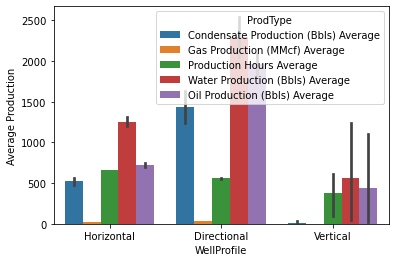

In [74]:
sns.barplot(x='WellProfile',y='Average Production',data=test,hue='ProdType')

In [107]:
wp_final.to_csv('productioneda.csv',index=False)

In [21]:
df1['ProdType']=df1['ProdType']
df1['Volume']=df1['Volume'].astype('int')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  961054 non-null  int64         
 1   ProdPeriod  961054 non-null  datetime64[ns]
 2   ProdType    961054 non-null  object        
 3   Volume      961054 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 29.3+ MB


In [53]:
alt.Chart(df1.sample(10)).mark_area(size=1).encode(
    x='ProdPeriod',
    y='Volume',
    color='ProdType')

alt.Chart(...)